In [200]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage import measure, color, io

In [201]:
file_1 = "Araruta.png"
file_2 = "grains2.jpg"
file_3 = "Mandioca.png"


img = cv.imread(file_3)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [202]:
ret, thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

In [203]:
kernel = np.ones((3, 3), np.uint8)
opening = cv.morphologyEx(thresh, cv.MORPH_OPEN, kernel, iterations=1)

In [207]:
sure_bg = cv.dilate(opening, kernel, iterations=2)
dist_transform = cv.distanceTransform(opening, cv.DIST_L2, 3)

rt2, sure_fg = cv.threshold(dist_transform, 0.1*dist_transform.max(), 255, 0)

sure_fg = np.uint8(sure_fg)

In [208]:
unknown = cv.subtract(sure_bg, sure_fg)

ret3, markers = cv.connectedComponents(sure_fg)

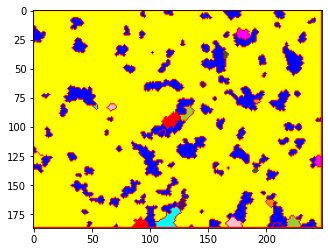

In [209]:
markers = markers + 10
markers[unknown==255] = 0

markers = cv.watershed(img, markers)
img[markers == 1] = [0, 255, 255]

plt.imshow(markers, cmap=plt.cm.jet)

img2 = color.label2rgb(markers, bg_label=0)

plt.imshow(img2, cmap=plt.cm.gray)
